### SALARY PREDICTION PRACTICE PROJECT

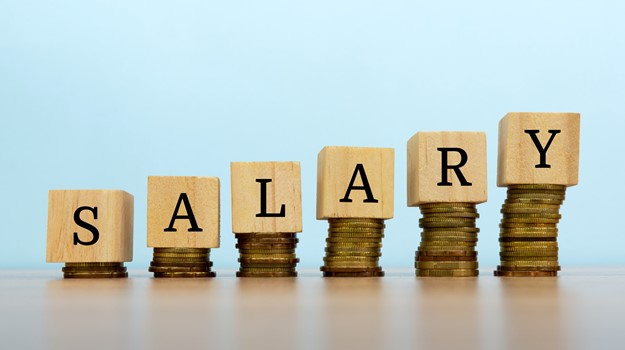

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv("Salaries.csv")

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

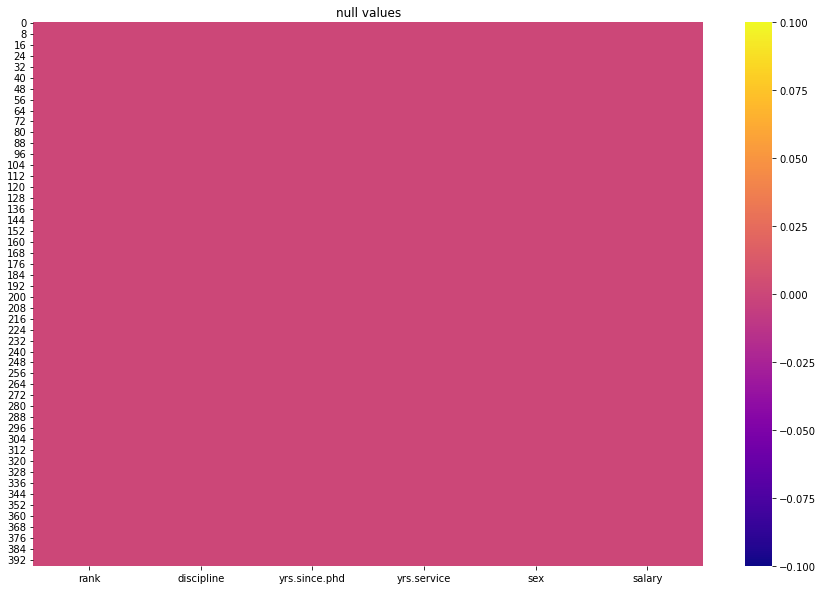

In [51]:

plt.figure(figsize=[15,10])
sns.heatmap(df.isnull(),cmap='plasma')
plt.title("null values")
plt.show()

In [6]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


we can see that there are categorical values the data set as well.

In [7]:
#checking unique values
#rank 
c_value = df[['rank']].values.ravel()
uniq_val = pd.unique(c_value)
uniq_val

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [8]:
#discipline 
c_val1 = df[['discipline']]. values. ravel()
uniq_val1 = pd. unique(c_val1)
uniq_val1


array(['B', 'A'], dtype=object)

In [9]:
#sex
c_val2 = df[['sex']]. values. ravel()
uniq_val2 = pd. unique(c_val2)
uniq_val2


array(['Male', 'Female'], dtype=object)

In [10]:
#converting categorical value into numerical value 
#rank
def rank_n(x):
    if x == 'Prof':
        return 1
    if x == 'AsstProf':
        return 2
    if x == 'AssocProf':
        return 3

In [11]:
df['rank']=df['rank'].apply(rank_n)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,B,19,18,Male,139750
1,1,B,20,16,Male,173200
2,2,B,4,3,Male,79750
3,1,B,45,39,Male,115000
4,1,B,40,41,Male,141500
...,...,...,...,...,...,...
392,1,A,33,30,Male,103106
393,1,A,31,19,Male,150564
394,1,A,42,25,Male,101738
395,1,A,25,15,Male,95329


In [12]:
#discipline
def discipline_n(x):
    if x == 'A':
        return 0
    if x == 'B':
        return 1

In [13]:
df['discipline']=df['discipline'].apply(discipline_n)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,1,19,18,Male,139750
1,1,1,20,16,Male,173200
2,2,1,4,3,Male,79750
3,1,1,45,39,Male,115000
4,1,1,40,41,Male,141500
...,...,...,...,...,...,...
392,1,0,33,30,Male,103106
393,1,0,31,19,Male,150564
394,1,0,42,25,Male,101738
395,1,0,25,15,Male,95329


In [14]:
#sex
def sex_n(x):
    if x == 'Male':
        return 0
    if x == 'Female':
        return 1

In [15]:
df['sex']=df['sex'].apply(sex_n)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,1,19,18,0,139750
1,1,1,20,16,0,173200
2,2,1,4,3,0,79750
3,1,1,45,39,0,115000
4,1,1,40,41,0,141500
...,...,...,...,...,...,...
392,1,0,33,30,0,103106
393,1,0,31,19,0,150564
394,1,0,42,25,0,101738
395,1,0,25,15,0,95329


In [16]:
#now since all the values are numerical we will check correlation and skewness
#correlation 

df.corr()


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,0.086266,-0.525500,-0.447499,0.132492,-0.522207
discipline,0.086266,1.000000,-0.218087,-0.164599,-0.003724,0.156084
yrs.since.phd,-0.525500,-0.218087,1.000000,0.909649,-0.148788,0.419231
yrs.service,-0.447499,-0.164599,0.909649,1.000000,-0.153740,0.334745
sex,0.132492,-0.003724,-0.148788,-0.153740,1.000000,-0.138610
salary,-0.522207,0.156084,0.419231,0.334745,-0.138610,1.000000


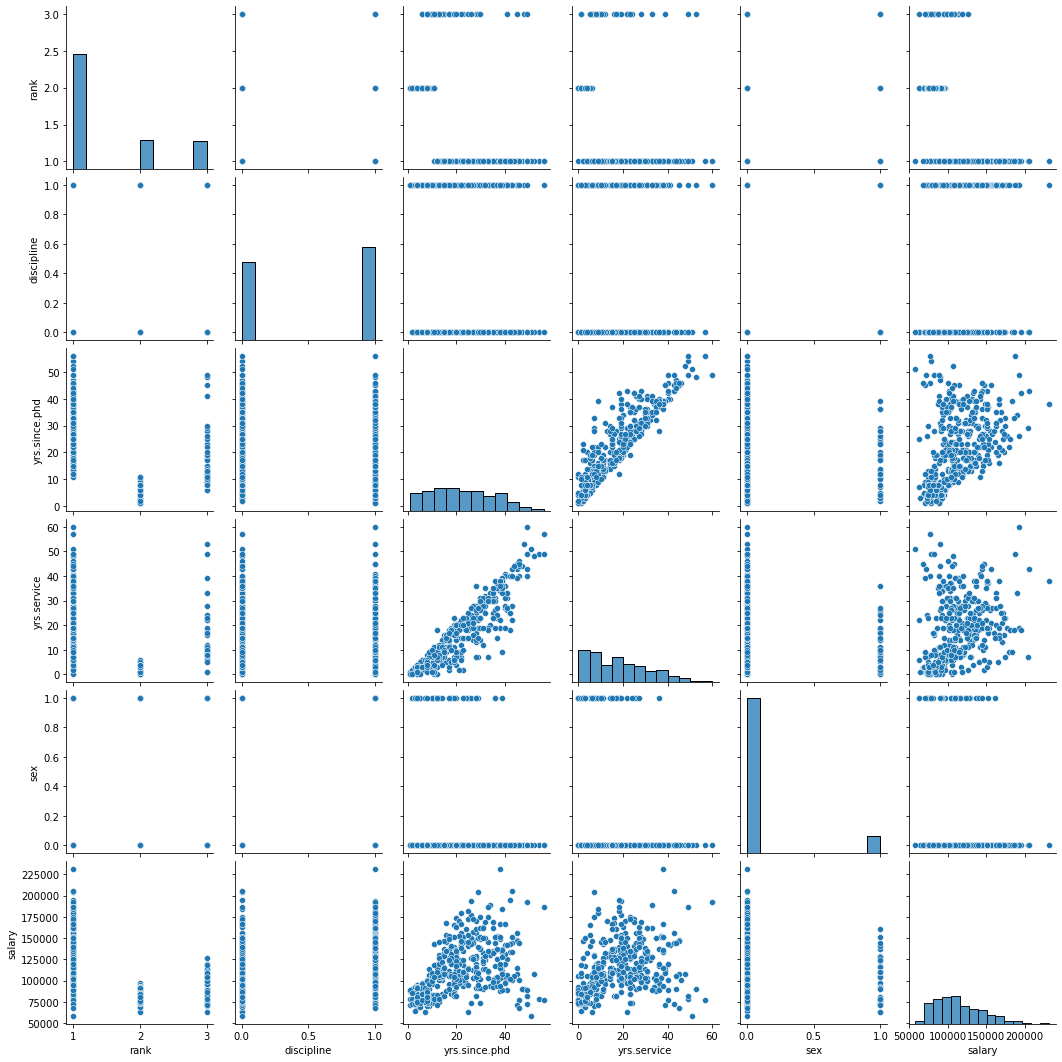

In [17]:
plot = sns.pairplot(df)

In [18]:
#skewness 
df.skew()

rank             1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

In [19]:
#dividing data into dependent and independent variable 
x = df.drop("salary", axis = 1)
y = df["salary"]

#check skewness
x.skew()

rank             1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
dtype: float64

<AxesSubplot:xlabel='salary', ylabel='sex'>

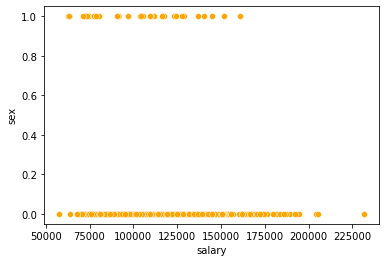

In [46]:
#salary vs sex
sns.scatterplot(x='salary', y='sex', data=df, color='orange')

sex has highest skewness and also this factor does not affect salary so we will drop this column

In [21]:
df_new=df.drop(['sex'], axis=1)

In [22]:
df_new.skew()

rank             1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

In [23]:
#dividing data into dependent and independent variable 
x = df_new.drop("salary", axis = 1)
y = df_new["salary"]

#check skewness
x.skew()

rank             1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
dtype: float64

In [24]:
# removing  skewness 
#importing necessary library
from sklearn.preprocessing import power_transform

#intialize
df1 = power_transform(x)

#create the new dataframe
df1 = pd.DataFrame(df1, columns = x.columns)

#check skewness
df1.skew()

rank             0.753358
discipline      -0.177684
yrs.since.phd   -0.132757
yrs.service     -0.122152
dtype: float64

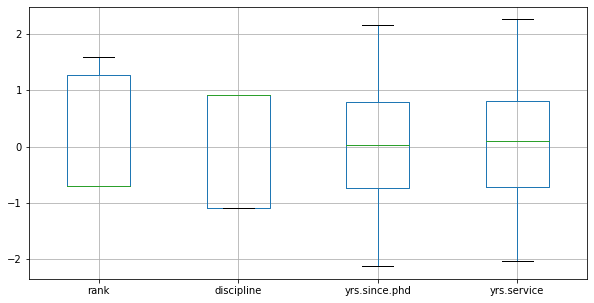

In [45]:
#Checking Outliers 
#making boxplots 
# plotin box plot for the attribute

x = df1
x.boxplot(figsize = [10,5])
plt.show()

In [26]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,salary
0,1,1,19,18,139750
1,1,1,20,16,173200
2,2,1,4,3,79750
3,1,1,45,39,115000
4,1,1,40,41,141500
...,...,...,...,...,...
392,1,0,33,30,103106
393,1,0,31,19,150564
394,1,0,42,25,101738
395,1,0,25,15,95329


In [27]:
# Data Processing

X=df_new.iloc[: , : -1].values
Y=df_new.iloc[: , -1].values

In [28]:
X

array([[ 1,  1, 19, 18],
       [ 1,  1, 20, 16],
       [ 2,  1,  4,  3],
       ...,
       [ 1,  0, 42, 25],
       [ 1,  0, 25, 15],
       [ 2,  0,  8,  4]], dtype=int64)

In [29]:
Y

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225,  80225,  77000, 155750,  86373, 125196, 100938,
       146500,  93418, 101299, 231545,  94384, 114778,  98193, 151768,
       140096,  70768, 126621, 108875,  74692, 106639, 103760,  83900,
       117704,  90215, 100135,  75044,  90304,  75243, 109785, 103613,
        68404, 100522, 101000,  99418, 111512,  91412, 126320, 146856,
       100131,  92391, 113398,  73266, 150480, 193000,  86100,  84240,
       150743, 135585, 144640,  88825, 122960, 132825, 152708,  88400,
       172272, 107008,  97032, 105128, 105631, 166024, 123683,  84000,
        95611, 129676, 102235, 106689, 133217, 126933, 153303, 127512,
        83850, 113543,  82099,  82600,  81500, 131205, 112429,  82100,
      

In [30]:
X.shape

(397, 4)

In [31]:
Y.shape

(397,)

LINEAR REGRESSION

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=35)
LR = LinearRegression()
LR.fit(X_train, Y_train)
pred = LR.predict(X_test)

print(r2_score(Y_test, pred))
print("Mean absolute error: ", mean_absolute_error(Y_test,pred))
print("Mean squared error: ", mean_squared_error(Y_test,pred))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, pred)))

0.318431422621122
Mean absolute error:  19908.07053300138
Mean squared error:  663921796.8122883
RMSE:  25766.679972636914


In [33]:
from sklearn.model_selection import cross_val_score
LR_CV = cross_val_score(LR,X,Y,cv=5)
LR_CV = LR_CV.mean()
print('C V Score:', LR_CV*100)

C V Score: 29.50537487886541


LASSO REGRESSION

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
LS= Lasso()
LS.fit(X_train,Y_train)
pred1 = LS.predict(X_test)
print(r2_score(Y_test, pred1))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred1))
print('Mean squared error: ',mean_squared_error(Y_test,pred1))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred1)))

0.3184383858575006
Mean absolute error:  19907.771182976205
Mean squared error:  663915013.8640105
Root Mean squared error:  25766.548349827735


In [35]:
from sklearn.model_selection import cross_val_score
LS_CV = cross_val_score(LS,X,Y,cv=5)
LS_CV = LS_CV.mean()
print('C V Score:', LS_CV*100)

C V Score: 29.506031820039922


RIDGE REGRESSOR 

In [36]:
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
RR= Ridge()
RR = Ridge(alpha=0.0001,random_state=0)
RR.fit(X_train,Y_train)
pred2 = RR.predict(X_test)
print(r2_score(Y_test, pred2))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred2))
print('Mean squared error: ',mean_squared_error(Y_test,pred2))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred2)))

0.3184314447700124
Mean absolute error:  19908.068810154935
Mean squared error:  663921775.2368642
Root Mean squared error:  25766.67955396784


In [37]:
from sklearn.model_selection import cross_val_score
RR_CV = cross_val_score(RR,X,Y,cv=5)
RR_CV = RR_CV.mean()
print('C V Score:', RR_CV*100)

C V Score: 29.50537795212457


DECISION TREE REGRESSOR

In [38]:
from sklearn.tree import DecisionTreeRegressor
DR = DecisionTreeRegressor(random_state = 0) 

DR.fit(X_train,Y_train)

pred3 = DR.predict(X_test)

print(r2_score(Y_test, pred3))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred3))
print('Mean squared error: ',mean_squared_error(Y_test,pred3))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred3)))

-0.04388750732038815
Mean absolute error:  21132.638364779876
Mean squared error:  1016859773.9575472
Root Mean squared error:  31888.238803006152


In [39]:
from sklearn.model_selection import cross_val_score
DR_CV = cross_val_score(DR,X,Y,cv=5)
DR_CV = DR_CV.mean()
print('C V Score:', DR_CV*100)

C V Score: -10.154192740876919


K- NEIGHBOR REGRESSOR

In [40]:
from sklearn import neighbors
KNN= neighbors.KNeighborsRegressor(n_neighbors=7)

KNN.fit(X_train, Y_train)

pred4 = KNN.predict(X_test)

print(r2_score(Y_test, pred4))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred4))
print('Mean squared error: ',mean_squared_error(Y_test,pred4))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred4)))

0.2829254858342646
Mean absolute error:  18704.435759209347
Mean squared error:  698508434.359004
Root Mean squared error:  26429.31013778082


HYPER PARAMETER TUNING 

In [41]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

KNN = neighbors.KNeighborsRegressor()

SALARY_MODEL = GridSearchCV(KNN, params, cv=5)
SALARY_MODEL.fit(X_train,Y_train)
SALARY_MODEL.best_params_

{'n_neighbors': 8}

In [42]:
#save model

import pickle
filename='salary.pkl'
pickle.dump(KNN,open(filename,'wb'))